# 시작

아래 한글 폰트 적용 코드는 한 차례 설치 후 런타임 다시 시작을 해주시기 바랍니다.  
런타임 다시 시작할 때는 아래 코드를 시행하실 필요는 없습니다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 그리기 전 바로 아래 주석처리된 코드를 붙여넣어주세요.
# plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,892 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

본 노트북에서 사용할 도구들입니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

코랩 환경에서는 아래 코드를 실행시켜 동봉된 파일들을 불러올 수 있습니다.

In [3]:
# from google.colab import files
# files.upload()

# **첫째마당 기온 공공 데이터**

### **Unit 2. 서울의 기온 데이터 분석하기**  
Unit 2의 데이터 불러오기는 아래와 같은 단순한 코드를 통해 구현할 수 있습니다.

In [4]:
!wget https://raw.githubusercontent.com/leetae04kr/file_to_use/main/모두의%20데이터%20분석/ta_20221128134955.csv
tempcsv='/content/ta_20221128134955.csv'

--2022-12-14 00:19:32--  https://raw.githubusercontent.com/leetae04kr/file_to_use/main/%EB%AA%A8%EB%91%90%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/ta_20221128134955.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356243 (1.3M) [text/plain]
Saving to: ‘ta_20221128134955.csv’

ta_20221128134955.c 100%[===================>]   1.29M  --.-KB/s    in 0.04s   

2022-12-14 00:19:33 (29.3 MB/s) - ‘ta_20221128134955.csv’ saved [1356243/1356243]



In [5]:
data_unit2 = pd.read_csv(tempcsv, encoding = 'cp949')
data_unit2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1909-01-01,143,-4.1,-8.0,0.1
1,\t1909-01-02,143,-0.8,-6.7,6.1
2,\t1909-01-03,143,1.0,-2.4,3.6
3,\t1909-01-04,143,4.2,0.0,9.2
4,\t1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41599,\t2022-11-23,143,13.0,8.0,18.2
41600,\t2022-11-24,143,8.7,4.8,15.8
41601,\t2022-11-25,143,9.2,1.1,17.0
41602,\t2022-11-26,143,10.9,6.0,17.3


### **Unit 3. 서울이 가장 더웠던 날은 언제였을까**

판다스에서 결측치를 확인하는 것은 여러가지 방법이 있습니다. 여기에선 두가지만 소개하겠습니다.

In [6]:
data_unit2.isnull().values.any()
# True가 이 데이터에 결측치가 있다는 의미입니다.

True

위 코드를 각각 쪼개서 소개하겠습니다.  
isnull() 함수는 데이터프레임 각 칸 안에 데이터가 **있으면 False, 없으면 True**로 바꿔줍니다.  
데이터만 변환해주기 때문에 여전히 데이터프레임 구조를 유지하고 있습니다.

In [7]:
print(data_unit2.isnull())
print('')
print(type(data_unit2.isnull()))

          날짜     지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0      False  False    False    False    False
1      False  False    False    False    False
2      False  False    False    False    False
3      False  False    False    False    False
4      False  False    False    False    False
...      ...    ...      ...      ...      ...
41599  False  False    False    False    False
41600  False  False    False    False    False
41601  False  False    False    False    False
41602  False  False    False    False    False
41603  False  False    False    False    False

[41604 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>


values는 데이터를 ndarray 형태로 바꿔줍니다.  
ndarray는 numpy에서 제공하는 아주 효율적인 배열 오브젝트로 한가지 타입의 데이터만을 담을 수 있습니다.

In [8]:
print(data_unit2.values)
print('')
print(type(data_unit2.values))
print('')
print(data_unit2.values.shape)
print('')
# 위에서 말한 것처럼 한가지 데이터 타입만을 담을 수있기에 object + int 데이터면 objcet 데이터로 저장됩니다.
print(data_unit2.values.dtype)
print('')
# 앞의 isnull() 함수와 합치면 다음과 같은 결과가 나타납니다.
print(data_unit2.isnull().values)

[['\t1909-01-01' 143 -4.1 -8.0 0.1]
 ['\t1909-01-02' 143 -0.8 -6.7 6.1]
 ['\t1909-01-03' 143 1.0 -2.4 3.6]
 ...
 ['\t2022-11-25' 143 9.2 1.1 17.0]
 ['\t2022-11-26' 143 10.9 6.0 17.3]
 ['\t2022-11-27' 143 7.7 0.4 14.9]]

<class 'numpy.ndarray'>

(41604, 5)

object

[[False False False False False]
 [False False False False False]
 [False False False False False]
 ...
 [False False False False False]
 [False False False False False]
 [False False False False False]]


any() 함수는 전달받은 인자 중 하나라도 True면 True를 반환합니다.  
data_unit2.isnull().values 의 결과와 합쳐지면 아래와 같이 나타나게 됩니다.

In [9]:
print(data_unit2.isnull().any())
print('')
print(data_unit2.isnull().values.any())

날짜         False
지점         False
평균기온(℃)     True
최저기온(℃)     True
최고기온(℃)     True
dtype: bool

True


판다스에 대해서 조금 더 깊게 이해해 보겠습니다.  
만일 데이터프레임의 한 열에 대해서만 isnull()과 같은 함수를 적용하면 데이터프레임이 아닌 인덱스를 가진 시리즈 데이터로 반환합니다.

In [10]:
print(data_unit2['최고기온(℃)'].isnull())
print('')
print(type(data_unit2['최고기온(℃)'].isnull()))

0        False
1        False
2        False
3        False
4        False
         ...  
41599    False
41600    False
41601    False
41602    False
41603    False
Name: 최고기온(℃), Length: 41604, dtype: bool

<class 'pandas.core.series.Series'>


위에서 isnull() 함수를 통해 인덱스와 각각의 인덱스에 대해 True / False 값이 주어진 시리즈를 데이터프레임에 전달해주면 인덱스가 True 값만을 표시합니다.  
즉, isnull()을 통해 빈 칸이 True가 되고 데이터프레임은 True 값이 있는(빈 칸이 있는) 인덱스만을 뽑아내게 됩니다.

In [11]:
data_unit2[data_unit2['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
21233,\t1967-02-19,143,1.0,NaN,NaN
23664,\t1973-10-16,143,12.0,NaN,NaN
38258,\t2013-09-30,143,NaN,20.1,NaN


혹은 다음과 같이 간단하게 통계로 확인 할 수 있습니다. RangeIndex, 데이터의 총 갯수와 Non-Null 데이터 갯수를 비교해보세요.

In [12]:
data_unit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41604 entries, 0 to 41603
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41604 non-null  object 
 1   지점       41604 non-null  int64  
 2   평균기온(℃)  41602 non-null  float64
 3   최저기온(℃)  41602 non-null  float64
 4   최고기온(℃)  41601 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


### 문제 풀이
서울의 날씨가 가장 높았던 날의 날짜와 기온 구하기

주어진 데이터에서 가장 높은 값을 구하는 것은 아래 코드 한 줄이면 충분합니다.  
max 함수는 default 값으로 axis = 0이 주어져 각 열별 데이터에서 최대값을 반환합니다.  
axis = 1일 경우 각 행별로 최대값을 반환합니다.

In [13]:
print(data_unit2.max(axis=0))
print('')
print(data_unit2.max(axis=1))
print('')
print(data_unit2['최고기온(℃)'].max())

날짜         \t2022-11-27
지점                  143
평균기온(℃)            33.1
최저기온(℃)            28.6
최고기온(℃)            40.0
dtype: object

0        143.0
1        143.0
2        143.0
3        143.0
4        143.0
         ...  
41599    143.0
41600    143.0
41601    143.0
41602    143.0
41603    143.0
Length: 41604, dtype: float64

40.0


<ipython-input-13-0461cbde7ee9>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data_unit2.max(axis=1))


문제 풀이 역시 간단합니다.  
위에서 찾은 최대 기온을 만족하는 인덱스를 찾고 날짜 데이터를 뽑아내면 끝입니다.

In [14]:
# 아래 코드를 통해 데이터가 특정 값을 갖는 인덱스를 추출할 수 있습니다.
print(data_unit2['최고기온(℃)'] == data_unit2['최고기온(℃)'].max())
print('')

# 위에서 Nan 값을 가진 행을 뽑아낸 것과 같이 조건을 만족하는 행을 출력해보겠습니다.
print(data_unit2[data_unit2['최고기온(℃)'] == data_unit2['최고기온(℃)'].max()])
print('')

# 위에서 찾아낸 행에서 특정 열, 날짜 컬럼을 지정해 날짜 데이터만을 추출하겠습니다.
print(data_unit2['날짜'][data_unit2['최고기온(℃)'] == data_unit2['최고기온(℃)'].max()])

0        False
1        False
2        False
3        False
4        False
         ...  
41599    False
41600    False
41601    False
41602    False
41603    False
Name: 최고기온(℃), Length: 41604, dtype: bool

                 날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
12265  \t1942-08-01  143     29.7     23.5     40.0

12265    \t1942-08-01
Name: 날짜, dtype: object


# **둘쨰마당 데이터 시각화 기초**

### **Unit 4. 데이터 기본 그래프 그리기**

다른 형식의 데이터를 판다스 데이터로 변환하는 것은 대부분의 경우 아래와 같이 pd.DataFrame()를 씌워주는 것으로도 충분합니다.  
별도로 지정하지 않았지만 list의 index에 맞추어 첫 시작 index(x축)가 0, 최종 index(x축)가 3이 된 것을 확인할 수 있습니다.

<function matplotlib.pyplot.show(*args, **kw)>

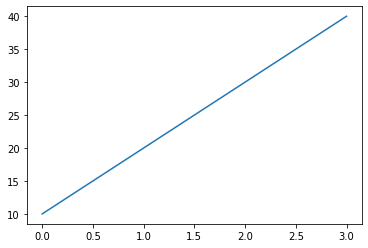

In [15]:
temp_data_1 = pd.DataFrame([10, 20, 30, 40])
plt.plot(temp_data_1)
plt.show

위에서 생성한 temp_data_1을 데이터프레임 표로 확인해 보겠습니다.  
방금 전 말한 것과 같이 index가 0부터 시작하는 것을 확인할 수 있습니다.  
컬럼명 역시 0부터 시작하는 것을 확인할 수 있습니다.

In [16]:
temp_data_1

,0
0,10
1,20
2,30
3,40


데이터 프레임의 인덱스는 reset_index 함수와 set_index 함수 두가지를 통해 쉽게 변경할 수 있습니다.  
하지만 여기에선 간단하게 1부터 시작하게 하는 트릭을 먼저 소개하겠습니다.

In [17]:
# index를 호출하게 되면 해당 데이터 프레임의 index가 array로 뽑아져 나오며 이를 다시 선언하거나 아래와 같이 수정해줄 수 있습니다.
print(temp_data_1.index)

# 아래 if문은 본 쉘을 여러번 돌려도 index가 1, 2, 3... 지속적으로 커지는 것을 방지하기 위해 걸어두었습니다.
if temp_data_1.index.start == 0:
    temp_data_1.index += 1
print(temp_data_1.index)

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=1, stop=5, step=1)


In [18]:
# 아래와 같이 index가 1부터 시작하는 것을 확인할 수 있습니다.
temp_data_1

,0
1,10
2,20
3,30
4,40


이번엔 인덱스 명을 직접 선택해주겠습니다.  
컬럼명 역시 유사한 방법으로 수정할 수 있습니다.

In [19]:
temp_data_1.index = ['A', 'B', 'C', 'D']

# 아래 코드는 컬럼명을 변경하는 코드입니다.
temp_data_1.columns = ['asc']
temp_data_1

,asc
A,10
B,20
C,30
D,40


처음에 그렸던 그래프와 아래의 그래프의 x축이 어떻게 변했는지 확인해 주세요.

<function matplotlib.pyplot.show(*args, **kw)>

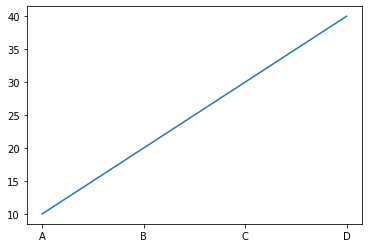

In [20]:
plt.plot(temp_data_1)
plt.show

아래와 같이 데이터프레임 생성하면서 선언을 해줄 수도 있습니다.  
단, list 형태로 입력해주어야합니다.

In [21]:
temp_data_2 = pd.DataFrame([40, 30, 20, 10], index = range(1, 5), columns = ['decs'])
temp_data_2

,decs
1,40
2,30
3,20
4,10


이번엔 set_index 함수에 대해서 알아보겠습니다.  
데이터 프레임의 한 열을 인덱스로 삼는 set_index를 보여드리겠습니다.  
날짜, 출석번호 등 열에 포함된 데이터면서 동시에 인덱스의 역할을 하는 데이터가 있을 경우 해당 함수를 통해 해당 열을 인덱스로 삼을 수 있습니다.

In [22]:
temp_data_3 = pd.DataFrame([[1, 10], [2, 20], [3, 30], [4, 40]], columns = ['index', 'data'])
temp_data_3 

,index,data
0,1,10
1,2,20
2,3,30
3,4,40


아래와 같이 컬럼명만 선택해서 간단히 생성할 수 있습니다.

In [23]:
temp_data_3 = temp_data_3.set_index('index')
temp_data_3

,data
index,
1,10
2,20
3,30
4,40


pandas와 plt의 조합은 하나하나 지정하지 않아도 똑똑하게 맞춰주지만 아래와 같은 오류가 발생하기도 합니다.



<function matplotlib.pyplot.show(*args, **kw)>

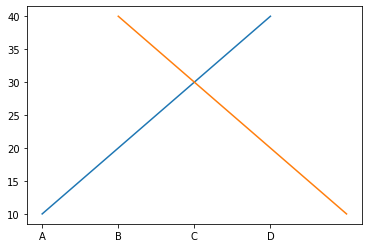

In [24]:
plt.figure()
plt.plot(temp_data_1)
plt.plot(temp_data_2)
plt.show

이것은 인덱스가 서로 맞지 않아 발생한 문제로 temp_data_1과 temp_data_2의 인덱스를 맞추어 주겠습니다.



<function matplotlib.pyplot.show(*args, **kw)>

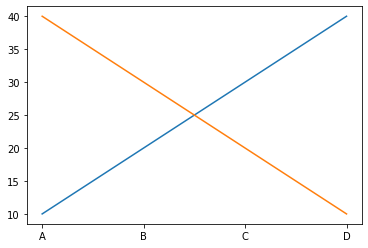

In [25]:
temp_data_2.index = ['A', 'B', 'C', 'D']
plt.figure()
plt.plot(temp_data_1)
plt.plot(temp_data_2)
plt.show

데이터가 index에 들어가있으면 계산, 통계 등 데이터로서 다루기 어려운 점이 있습니다. 이 경우 reset_index() 함수를 통해 인덱스를 열 데이터로 뽑아올 수 있습니다.

In [26]:
temp_data_3.reset_index()

,index,data
0,1,10
1,2,20
2,3,30
3,4,40


### **Unit 5. 내 생일의 기온 변화를 그래프로 그리기**

이번 unit에서는 데이터 분석에 조금 더 초점을 맞춰보겠습니다.

In [27]:
# 데이터를 불러옵니다.
data_unit2 = pd.read_csv(tempcsv, encoding = 'cp949')
data_unit2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1909-01-01,143,-4.1,-8.0,0.1
1,\t1909-01-02,143,-0.8,-6.7,6.1
2,\t1909-01-03,143,1.0,-2.4,3.6
3,\t1909-01-04,143,4.2,0.0,9.2
4,\t1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41599,\t2022-11-23,143,13.0,8.0,18.2
41600,\t2022-11-24,143,8.7,4.8,15.8
41601,\t2022-11-25,143,9.2,1.1,17.0
41602,\t2022-11-26,143,10.9,6.0,17.3


info() 함수는 몇개의 데이터가 있고 데이터 타입은 어떤지 등 데이터프레임의 통계자료를 보여줍니다.  
아래 날짜 열의 데이터 타입을 주목해주세요.

In [28]:
data_unit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41604 entries, 0 to 41603
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41604 non-null  object 
 1   지점       41604 non-null  int64  
 2   평균기온(℃)  41602 non-null  float64
 3   최저기온(℃)  41602 non-null  float64
 4   최고기온(℃)  41601 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


아래 코드는 '날짜' 열의 데이터를 Datetime 데이터로 변환해주는 함수입니다.  
일반 숫자 데이터와 다르게 날짜는 1~12, 1~28, 29, 30, 31 등 일괄적으로 처리하기 까다로운 면이 있습니다.  
Datetime 데이터는 날짜 데이터를 손쉽게 다룰 수 있도록 도와줍니다.

In [29]:
data_unit2['날짜'] = pd.to_datetime(data_unit2['날짜'])
data_unit2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41599,2022-11-23,143,13.0,8.0,18.2
41600,2022-11-24,143,8.7,4.8,15.8
41601,2022-11-25,143,9.2,1.1,17.0
41602,2022-11-26,143,10.9,6.0,17.3


아래와 같이 datetime 데이터로 변환된 것을 확인할 수 있습니다.

In [30]:
data_unit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41604 entries, 0 to 41603
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       41604 non-null  datetime64[ns]
 1   지점       41604 non-null  int64         
 2   평균기온(℃)  41602 non-null  float64       
 3   최저기온(℃)  41602 non-null  float64       
 4   최고기온(℃)  41601 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


DateTime 데이터는 다음과 같이 연 / 월 / 일을 추출할 수 있습니다.  
인덱스 역시 함께 추출된 것을 확인하실 수 있을 겁니다.  
이후 다음의 성질을 이용해 특정 날짜 데이터만 추출해 보겠습니다.

In [31]:
# dt(datetime) 요소의 year 요소를 출력
print(data_unit2['날짜'].dt.year.head())
print('')

# dt(datetime) 요소의 month 요소를 출력
print(data_unit2['날짜'].dt.month.head())
print('')

# dt(datetime) 요소의 day 요소를 출력
print(data_unit2['날짜'].dt.day.head())

0    1909
1    1909
2    1909
3    1909
4    1909
Name: 날짜, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: 날짜, dtype: int64

0    1
1    2
2    3
3    4
4    5
Name: 날짜, dtype: int64


### 문제풀이

위에서 배운 내용을 응용해 12월 데이터만 뽑아보겠습니다.

In [32]:
data_unit2[data_unit2['날짜'].dt.month == 12]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
334,1909-12-01,143,0.1,-4.1,2.9
335,1909-12-02,143,1.2,-2.1,5.2
336,1909-12-03,143,-0.3,-3.4,3.0
337,1909-12-04,143,0.7,-5.3,6.3
338,1909-12-05,143,3.8,-2.8,9.3
...,...,...,...,...,...
41268,2021-12-27,143,-2.1,-7.9,2.3
41269,2021-12-28,143,2.1,-3.4,7.4
41270,2021-12-29,143,3.5,-2.6,10.0
41271,2021-12-30,143,1.1,-1.9,4.9


10일 데이터만 뽑아보겠습니다.

In [33]:
data_unit2[data_unit2['날짜'].dt.day == 10]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
9,1909-01-10,143,1.1,-5.3,8.4
40,1909-02-10,143,1.1,-7.9,10.2
68,1909-03-10,143,7.3,3.7,11.4
99,1909-04-10,143,10.8,1.2,21.6
129,1909-05-10,143,16.5,12.8,21.9
...,...,...,...,...,...
41463,2022-07-10,143,28.1,24.1,33.4
41494,2022-08-10,143,28.2,26.5,31.0
41525,2022-09-10,143,21.0,18.6,24.2
41555,2022-10-10,143,13.7,11.2,17.3


그렇다면 12월 10일을 뽑으려면 어떻게 해야할까요?  
두 조건문을 모두 충족하는 데이터를 뽑기 위해선 아래와 같이 괄호()로 묶어 준 뒤 조건 부호를 통해 여러 조건을 적용할 수 있습니다.  
부호는 각각 &(and), |(or), ~(not)입니다.  
두개 이상의 조건도 가능합니다.

In [34]:
(data_unit2['날짜'].dt.month == 12) & (data_unit2['날짜'].dt.day == 10)

0        False
1        False
2        False
3        False
4        False
         ...  
41599    False
41600    False
41601    False
41602    False
41603    False
Name: 날짜, Length: 41604, dtype: bool

이후 코드가 너무 길어지기 때문에 간결성을 위해 birth_day라는 변수에 저장하겠습니다.

In [35]:
birth_day = data_unit2[(data_unit2['날짜'].dt.month == 12) & (data_unit2['날짜'].dt.day == 10)]
birth_day

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
343,1909-12-10,143,-1.9,-4.8,1.4
708,1910-12-10,143,-6.4,-9.3,-2.0
1073,1911-12-10,143,-0.5,-3.6,4.1
1439,1912-12-10,143,-3.5,-8.6,2.9
1804,1913-12-10,143,5.3,-1.6,13.6
...,...,...,...,...,...
39790,2017-12-10,143,4.1,-0.5,11.0
40155,2018-12-10,143,-1.6,-8.3,6.3
40520,2019-12-10,143,4.9,-1.9,14.0
40886,2020-12-10,143,5.9,1.4,12.2


판다스 데이터를 그래프로 그리기는 두가지 방법이 있습니다.  
데이터프레임명.그래프형태(변수)  
그래프형태(데이터프레임, 변수)  
먼저 데이터프레임에 함수를 붙여 그려보겠습니다.

In [36]:
plt.rc('font', family='NanumBarunGothic')
birth_day.plot(x = '날짜', y = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)'])
plt.show()

# 중간에 끊어진 것은 결측치입니다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_

교재의 방식을 그대로 적용하면 다음과 같습니다.  
이 경우 label을 지정하지 않으면 등장하지 않고 또한 plt.legend()를 선언해 주어야 해당 label을 표에 등장시킬 수 있습니다.



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_

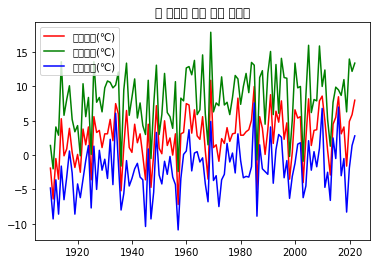

In [37]:
plt.rc('font', family='NanumBarunGothic')
plt.title('내 생일의 기온 변화 그래프')
plt.plot(birth_day['날짜'], birth_day['평균기온(℃)'], color = 'r', label = '평균기온(℃)')
plt.plot(birth_day['날짜'], birth_day['최고기온(℃)'], color = 'g', label = '최고기온(℃)')
plt.plot(birth_day['날짜'], birth_day['최저기온(℃)'], color = 'b', label = '최저기온(℃)')
plt.legend()
plt.show()

혹은, 첫번째처럼 한 번에 그려줄 수도 있습니다. y데이터에 여러 열을 동시에 선택하기 위해선 birth_day[[선택한 열]]로 묶어주여야 합니다.

In [38]:
plt.rc('font', family='NanumBarunGothic')
plt.plot(birth_day['날짜'], birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']])
plt.show()

판다스에서 특정 열을 아래와 같이 선택해줄 수 있습니다. 아래 타입을 주의하세요.  
[[열 이름]] 특정 열을 추출해 새로운 데이터 프레임을 반환합니다.  
[열 이름] 한개의 열만 추출할 수 있으며 인덱스와 데이터가 있는 시리즈를 반환합니다.

In [39]:
print(birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']])
print('')

print(type(birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']]))
print('')

print(birth_day['평균기온(℃)'])
print('')

print(type(birth_day['평균기온(℃)']))

       평균기온(℃)  최저기온(℃)  최고기온(℃)
343       -1.9     -4.8      1.4
708       -6.4     -9.3     -2.0
1073      -0.5     -3.6      4.1
1439      -3.5     -8.6      2.9
1804       5.3     -1.6     13.6
...        ...      ...      ...
39790      4.1     -0.5     11.0
40155     -1.6     -8.3      6.3
40520      4.9     -1.9     14.0
40886      5.9      1.4     12.2
41251      8.0      2.8     13.4

[113 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>

343     -1.9
708     -6.4
1073    -0.5
1439    -3.5
1804     5.3
        ... 
39790    4.1
40155   -1.6
40520    4.9
40886    5.9
41251    8.0
Name: 평균기온(℃), Length: 113, dtype: float64

<class 'pandas.core.series.Series'>


### **Unit 6. 기온 데이터를 다양하게 시각화하기**  
DateTime 변환 및 기타 데이터 전처리는 unit 5와 동일합니다.  
이전 unit의 내용을 참조해 주세요

8월과 12월의 최고 기온을 각각 aug와 jan 변수에 저장합니다.

In [40]:
aug = data_unit2[data_unit2['날짜'].dt.month == 8]['최고기온(℃)']
jan = data_unit2[data_unit2['날짜'].dt.month == 1]['최고기온(℃)']

여기에선 교재를 그대로 재현하지만 경우에 따라 위에서 소개한 방식들을 통해 원하는 방법으로 그릴 수 있습니다.  
먼저 8월과 1월의 최고기온을 히스토그램으로 그리겠습니다.


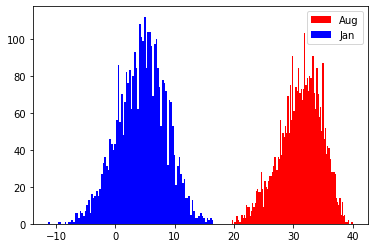

In [41]:
plt.rc('font', family='NanumBarunGothic')
plt.hist(aug, bins = 100, color = 'r', label = 'Aug')
plt.hist(jan, bins = 100, color = 'b', label = 'Jan')
plt.legend()
plt.show()

그런데 혹시 눈치 채셨나요? 방금 코드에선 unit 5와 다르게 데이터프레임에서 조건을 적용하는 순서를 바꿔서 적용해보았습니다.  
최고기온을 뽑아내고 여기에서 날짜가 8월인 것을 골라내는 것과 날짜가 8월인 것을 골라내고 그 중 최고기온 열만 고르는 것은 동일합니다.



In [42]:
print(data_unit2['최고기온(℃)'][data_unit2['날짜'].dt.month == 8])
print('')
print(data_unit2[data_unit2['날짜'].dt.month == 8]['최고기온(℃)'])

212      28.3
213      27.8
214      29.1
215      34.1
216      32.8
         ... 
41511    28.2
41512    27.5
41513    24.9
41514    24.1
41515    22.7
Name: 최고기온(℃), Length: 3534, dtype: float64

212      28.3
213      27.8
214      29.1
215      34.1
216      32.8
         ... 
41511    28.2
41512    27.5
41513    24.9
41514    24.1
41515    22.7
Name: 최고기온(℃), Length: 3534, dtype: float64


8월의 최고기온을 박스로 그리겠습니다.  
단, plt.boxplot은 입력 데이터를 시퀀스로 받기 때문에 판다스 시리즈를 변환해주어야합니다.  
위에서 등장한 .values 명령어 한 줄이면 충분합니다.  
**결측치가 존재할 경우** 날짜 인덱스가 있던 다른 그래프와 달리 boxplot은 그려지지 않기 떄문에 결측치는 dropna() 함수를 통해 제거해 주었습니다.

In [43]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 300)
plt.boxplot(aug.dropna().values, showfliers = False)
plt.show()

# **셋째마당 인구 공공데이터**

### **Unit 7. 우리 동네 인구 구조 시각화하기**

In [44]:
!wget https://raw.githubusercontent.com/leetae04kr/file_to_use/main/모두의%20데이터%20분석/202210_202210_%25EC%2597%25B0%25EB%25A0%25B9%25EB%25B3%2584%25EC%259D%25B8%25EA%25B5%25AC%25ED%2598%2584%25ED%2599%25A9_%25EC%259B%2594%25EA%25B0%2584.csv

--2022-12-14 00:19:38--  https://raw.githubusercontent.com/leetae04kr/file_to_use/main/%EB%AA%A8%EB%91%90%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/202210_202210_%25EC%2597%25B0%25EB%25A0%25B9%25EB%25B3%2584%25EC%259D%25B8%25EA%25B5%25AC%25ED%2598%2584%25ED%2599%25A9_%25EC%259B%2594%25EA%25B0%2584.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2327433 (2.2M) [text/plain]
Saving to: ‘202210_202210_연령별인구현황_월간.csv’

202210_202210_연령  100%[===================>]   2.22M  --.-KB/s    in 0.05s   

2022-12-14 00:19:38 (48.5 MB/s) - ‘202210_202210_연령별인구현황_월간.csv’ saved [2327433/2327433]



In [45]:
agecsv='/content/202210_202210_연령별인구현황_월간.csv'

데이터를 불러 옵니다.  
1000단위 콤마를 처리해주기 위해 pd.read_csv 함수에 thousands 인자를 추가해 주었습니다.



In [46]:
age_data = pd.read_csv(agecsv, encoding = 'cp949', thousands = ',')
age_data.head()

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
0,서울특별시 (1100000000),9443722,9443722,40810,44165,44886,48835,51417,55828,63944,...,7599,6628,5436,4014,2948,1801,1254,926,796,1301
1,서울특별시 종로구 (1111000000),141861,141861,451,478,513,544,562,659,771,...,168,134,111,89,69,47,27,22,16,31
2,서울특별시 종로구 청운효자동(1111051500),11700,11700,45,48,47,55,47,82,77,...,16,7,7,5,5,5,3,3,0,3
3,서울특별시 종로구 사직동(1111053000),9128,9128,27,35,36,38,50,60,66,...,16,11,18,5,6,5,6,2,3,2
4,서울특별시 종로구 삼청동(1111054000),2343,2343,3,6,6,3,9,13,9,...,3,5,2,3,1,1,0,1,0,2


불러온 데이터프레임의 정보를 info() 함수로 확인해보겠습니다.  
오브젝트 1개를 제외하면 나머지 데이터는 전부 숫자(int64)로 이루어졌다는 것을 기억해주세요.  
직관적으로 아시겠지만 오브젝트 타입의 데이터는 '행정구역' 열임니다.

In [47]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Columns: 104 entries, 행정구역 to 2022년10월_계_100세 이상
dtypes: int64(103), object(1)
memory usage: 3.1+ MB


특정 문자열을 검색하기 위해선 판다스 시리즈 데이터에 내장된 str.contains 함수를 사용할 수 있습니다.  
시리즈를 불러오기 위해선 ['컬럼명'] 데이터프레임을 불러오기 위해선 [['컬럼명']]을 사용하면 됩니다.  
우선 시리즈 데이터로 불러와 보겠습니다.

In [48]:
print(type(age_data['행정구역']))
print('')
age_data['행정구역']

<class 'pandas.core.series.Series'>



0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3865    제주특별자치도 서귀포시 서홍동(5013058000)
3866    제주특별자치도 서귀포시 대륜동(5013059000)
3867    제주특별자치도 서귀포시 대천동(5013060000)
3868    제주특별자치도 서귀포시 중문동(5013061000)
3869    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3870, dtype: object

데이터 프레임으로 불러와 보겠습니다.

In [49]:
print(type(age_data[['행정구역']]))
print('')
age_data[['행정구역']]

<class 'pandas.core.frame.DataFrame'>



,행정구역
0,서울특별시 (1100000000)
1,서울특별시 종로구 (1111000000)
2,서울특별시 종로구 청운효자동(1111051500)
3,서울특별시 종로구 사직동(1111053000)
4,서울특별시 종로구 삼청동(1111054000)
...,...
3865,제주특별자치도 서귀포시 서홍동(5013058000)
3866,제주특별자치도 서귀포시 대륜동(5013059000)
3867,제주특별자치도 서귀포시 대천동(5013060000)
3868,제주특별자치도 서귀포시 중문동(5013061000)


### 문제풀이

판다스 시리즈 데이터를 불러오고 앞서 언급했던 내장함수를 통해 검색해보겠습니다.  
아래 코드와 같이 조건에 따라 index를 True / False 형태로 반환하고,

In [50]:
age_data['행정구역'].str.contains('달서구')

0       False
1       False
2       False
3       False
4       False
        ...  
3865    False
3866    False
3867    False
3868    False
3869    False
Name: 행정구역, Length: 3870, dtype: bool


True인 인덱스만 출력하면 다음과 같습니다.  
이후 코드가 너무 길어지기 때문에 해당 데이터는 city_data라는 변수에 저장해두겠습니다.

In [51]:
city_data = age_data[age_data['행정구역'].str.contains('달서구')]
city_data

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
791,대구광역시 달서구 (2729000000),537179,537179,2000,2289,2497,2832,3164,3558,4415,...,409,335,249,184,104,64,49,41,16,40
792,대구광역시 달서구 성당동(2729051500),22749,22749,57,66,101,96,114,131,176,...,13,15,13,7,6,4,3,3,0,6
793,대구광역시 달서구 두류1.2동(2729053500),13935,13935,24,41,41,42,36,50,57,...,14,12,8,8,4,4,0,0,0,2
794,대구광역시 달서구 두류3동(2729055000),7945,7945,15,13,17,28,23,29,44,...,13,5,6,4,0,0,0,1,1,1
795,대구광역시 달서구 감삼동(2729055500),27305,27305,157,158,185,194,218,210,305,...,11,7,9,13,3,2,1,1,0,2
796,대구광역시 달서구 죽전동(2729056300),13065,13065,31,24,44,42,41,41,71,...,11,12,0,3,3,3,1,0,0,0
797,대구광역시 달서구 장기동(2729056800),16731,16731,78,85,77,86,105,108,140,...,8,14,3,5,3,1,1,1,1,1
798,대구광역시 달서구 용산1동(2729057100),30134,30134,78,117,120,133,149,151,208,...,16,10,11,6,0,3,2,1,0,2
799,대구광역시 달서구 용산2동(2729057200),27851,27851,86,103,96,120,115,158,208,...,7,10,9,8,3,4,2,1,1,2
800,대구광역시 달서구 이곡1동(2729057600),22387,22387,60,76,87,88,101,86,143,...,12,9,6,5,5,1,0,0,1,1


이번엔 위에서 조건문을 통해 뽑아낸 데이터를 그래프로 그려보겠습니다.  
아쉽게도 아래 코드를 그대로 시행 시키면 오류가 발생합니다.  
해당 오류는 문자열(오브젝트)때문에 발생한 오류로 문자열인 '행정구역' 열을 인덱스로 빼거나 혹은 이것을 제외하고 불러와야합니다.



```
# plt.style.use('ggplot')
# plt.plot(city_data)
# plt.show()
```



위에서 소개했던 방식처럼 '행정구역' 열을 인덱스로 빼주도록 하겠습니다.


In [52]:
city_data = city_data.set_index('행정구역')
city_data

,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
대구광역시 달서구 (2729000000),537179,537179,2000,2289,2497,2832,3164,3558,4415,4672,...,409,335,249,184,104,64,49,41,16,40
대구광역시 달서구 성당동(2729051500),22749,22749,57,66,101,96,114,131,176,174,...,13,15,13,7,6,4,3,3,0,6
대구광역시 달서구 두류1.2동(2729053500),13935,13935,24,41,41,42,36,50,57,53,...,14,12,8,8,4,4,0,0,0,2
대구광역시 달서구 두류3동(2729055000),7945,7945,15,13,17,28,23,29,44,38,...,13,5,6,4,0,0,0,1,1,1
대구광역시 달서구 감삼동(2729055500),27305,27305,157,158,185,194,218,210,305,285,...,11,7,9,13,3,2,1,1,0,2
대구광역시 달서구 죽전동(2729056300),13065,13065,31,24,44,42,41,41,71,52,...,11,12,0,3,3,3,1,0,0,0
대구광역시 달서구 장기동(2729056800),16731,16731,78,85,77,86,105,108,140,143,...,8,14,3,5,3,1,1,1,1,1
대구광역시 달서구 용산1동(2729057100),30134,30134,78,117,120,133,149,151,208,216,...,16,10,11,6,0,3,2,1,0,2
대구광역시 달서구 용산2동(2729057200),27851,27851,86,103,96,120,115,158,208,199,...,7,10,9,8,3,4,2,1,1,2


'행정구역' 이외에도 불필요한 자료가 많습니다.  
총 인구수 항목들을 제외하고 불러오도록 합니다.  
columns.difference 함수는 선택된 열이 아닌 열만을 선택합니다.  
이 과정에서 재정렬되지 않도록 sort 항목을 False로 두겠습니다.  
참고로 이 항목의 default값은 True가 아닌 None으로 True를 입력하면 오류가 발생하게 됩니다.

In [53]:
city_data[city_data.columns.difference([' 2022년10월_계_총인구수', '2022년10월_계_연령구간인구수', '2022년10월_계_총인구수'], sort = False)]

,2022년10월_계_0세,2022년10월_계_1세,2022년10월_계_2세,2022년10월_계_3세,2022년10월_계_4세,2022년10월_계_5세,2022년10월_계_6세,2022년10월_계_7세,2022년10월_계_8세,2022년10월_계_9세,...,2022년10월_계_91세,2022년10월_계_92세,2022년10월_계_93세,2022년10월_계_94세,2022년10월_계_95세,2022년10월_계_96세,2022년10월_계_97세,2022년10월_계_98세,2022년10월_계_99세,2022년10월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
대구광역시 달서구 (2729000000),2000,2289,2497,2832,3164,3558,4415,4672,4576,4552,...,409,335,249,184,104,64,49,41,16,40
대구광역시 달서구 성당동(2729051500),57,66,101,96,114,131,176,174,195,165,...,13,15,13,7,6,4,3,3,0,6
대구광역시 달서구 두류1.2동(2729053500),24,41,41,42,36,50,57,53,71,50,...,14,12,8,8,4,4,0,0,0,2
대구광역시 달서구 두류3동(2729055000),15,13,17,28,23,29,44,38,58,39,...,13,5,6,4,0,0,0,1,1,1
대구광역시 달서구 감삼동(2729055500),157,158,185,194,218,210,305,285,233,233,...,11,7,9,13,3,2,1,1,0,2
대구광역시 달서구 죽전동(2729056300),31,24,44,42,41,41,71,52,68,55,...,11,12,0,3,3,3,1,0,0,0
대구광역시 달서구 장기동(2729056800),78,85,77,86,105,108,140,143,144,139,...,8,14,3,5,3,1,1,1,1,1
대구광역시 달서구 용산1동(2729057100),78,117,120,133,149,151,208,216,235,234,...,16,10,11,6,0,3,2,1,0,2
대구광역시 달서구 용산2동(2729057200),86,103,96,120,115,158,208,199,177,202,...,7,10,9,8,3,4,2,1,1,2


코드가 너무 길기 때문에 변수를 정리해 두도록 하겠습니다.

In [54]:
city_data = city_data[city_data.columns.difference([' 2022년10월_계_총인구수', '2022년10월_계_연령구간인구수', '2022년10월_계_총인구수'], sort = False)]

아래 코드는 저희가 원하는 대로 그려지지 않았습니다.  
이 경우에는 x데이터와 y데이터를 따로 집어넣어주어야합니다.  

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_

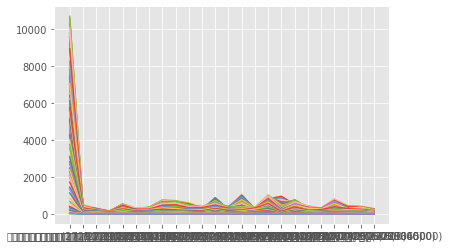

In [55]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.plot(city_data)
plt.show()

우리가 원하는 대로 그리기 위해선 우리가 원하는 그래프의 각 요소가 어떤 값을 받으면 좋을지 생각해 보아야 합니다.  
가장 먼저 x축은 0세부터 101세 이상까지 순차적으로 배열되면 좋겠습니다.  
y축은 지금 그대로 0 ~ 1000 사이에 잡힐 숫자 데이터여야 할 것입니다.  
그리고 나서 찍히는 데이터는 각 지역별 / 나이 별 인구수가 찍히면 좋겠습니다.  


그럼 먼저 x축부터 준비해 볼까요?  
저희가 원하는 것을 위의 데이터 프레임에서 살펴보면 컬럼명이군요?
이전에 다뤘던 columns를 사용하면 될 것 같습니다.

In [56]:
city_data.columns

Index(['2022년10월_계_0세', '2022년10월_계_1세', '2022년10월_계_2세', '2022년10월_계_3세',
       '2022년10월_계_4세', '2022년10월_계_5세', '2022년10월_계_6세', '2022년10월_계_7세',
       '2022년10월_계_8세', '2022년10월_계_9세',
       ...
       '2022년10월_계_91세', '2022년10월_계_92세', '2022년10월_계_93세', '2022년10월_계_94세',
       '2022년10월_계_95세', '2022년10월_계_96세', '2022년10월_계_97세', '2022년10월_계_98세',
       '2022년10월_계_99세', '2022년10월_계_100세 이상'],
      dtype='object', length=101)

이번에는 찍힐 데이터를 생각해 봅시다.  
각 행의 데이터를 x축에 맞추어서 찍어주면 될 것 같습니다.  
각 행의 데이터만을 추출하기 위해선 iloc[원하는 행의 인덱스] / loc[원하는 행의 이름] 형태로 불러올 수 있습니다.

---



In [57]:
city_data.iloc[0]

2022년10월_계_0세         2000
2022년10월_계_1세         2289
2022년10월_계_2세         2497
2022년10월_계_3세         2832
2022년10월_계_4세         3164
                      ... 
2022년10월_계_96세          64
2022년10월_계_97세          49
2022년10월_계_98세          41
2022년10월_계_99세          16
2022년10월_계_100세 이상      40
Name: 대구광역시 달서구 (2729000000), Length: 101, dtype: int64

In [58]:
city_data.loc['대구광역시 달서구 (2729000000)']

2022년10월_계_0세         2000
2022년10월_계_1세         2289
2022년10월_계_2세         2497
2022년10월_계_3세         2832
2022년10월_계_4세         3164
                      ... 
2022년10월_계_96세          64
2022년10월_계_97세          49
2022년10월_계_98세          41
2022년10월_계_99세          16
2022년10월_계_100세 이상      40
Name: 대구광역시 달서구 (2729000000), Length: 101, dtype: int64

동일한 데이터가 나오지만 인덱스가 더 짧군요.  
정리해보겠습니다.  
.columns는 컬럼명만 뽑아주어 x축으로 삼고, iloc를 통해 각 행의 데이터를 추출하여 y값에 넣어주었습니다.  
추가로 iloc는 index 순서 기준, loc는 인덱스명을 기준으로 행 데이터를 뽑아올 수 있으며 iloc[[인덱스1, 인덱스2...]]와 같은 형태로 여러 행을 동시에 뽑아올 수도 있습니다.  
그럼 그려볼까요?


In [59]:
# legend는 생략하였습니다.
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.plot(city_data.columns, city_data.iloc[0])
plt.plot(city_data.columns, city_data.iloc[1])
plt.plot(city_data.columns, city_data.iloc[2])
plt.plot(city_data.columns, city_data.iloc[3])
plt.plot(city_data.columns, city_data.iloc[4])
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

### **Unit 8. 인구 구조를 다양한 형태로 시각화하기**

unit 7 문제풀이에서 사용한 그래프를 가져와 plot 그래프를 bar그래프와 barh그래프로 그려보겠습니다.

In [60]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.bar(city_data.columns, city_data.iloc[0])
plt.bar(city_data.columns, city_data.iloc[1])
plt.bar(city_data.columns, city_data.iloc[2])
plt.bar(city_data.columns, city_data.iloc[3])
plt.bar(city_data.columns, city_data.iloc[4])
plt.show()

In [61]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.barh(city_data.columns, city_data.iloc[0])
plt.barh(city_data.columns, city_data.iloc[1])
plt.barh(city_data.columns, city_data.iloc[2])
plt.barh(city_data.columns, city_data.iloc[3])
plt.barh(city_data.columns, city_data.iloc[4])
plt.show()